## Homework 2

#### John Stachurski

OSM 2018

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [8]:
# import packages
import math
import numpy as np

In [52]:
σ = 0.5
n = 100
silverman = ((4 * σ ** 5) / (3 * n)) ** (1 / 5)
class Kernel (object): 
    def __init__(self, data = np.ndarray, bandwidth = None):
        self.X = data
        self.n = data.size()
        if not bandwidth:
            self.h = self.silverman()
        else:
            self.h = bandwidth
    def silverman(self):
        return ((4 * np.sqrt(np.var(self.X)) ** 5) / (3 * self.n)) ** (1 / 5)
    def f(self, x):
        K = norm.pdf
        result = 0
        for i in range(1,101):
            result += K * (x - self.X[i]) / self.h
        return (result / (self.h * self.n))

### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

In [49]:
# import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm, gaussian_kde, beta

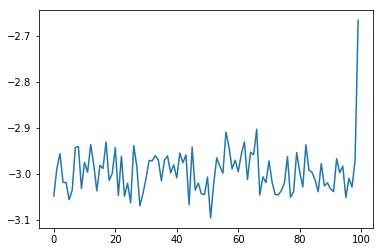

In [43]:
μ = -3
s = 0.2
b = 0.0
ρ = 0.9
σ = 0.1
def psi():
    n = 100
    ψ = np.empty(n)
    ψ[0] = 0
    for t in range(n-1):
        ψ[t] = np.random.normal(μ, s ** 2)
        ψ[t+1] = np.random.normal(ρ * μ + b, ρ ** 2 * s ** 2 + σ ** 2)
    plt.plot(ψ)
    plt.show()
psi()

In [44]:
def update(x, ρ = ρ, b = b, σ = σ):
    ζ = np.random.standard_normal()
    return (ρ * x + b + σ * ζ)

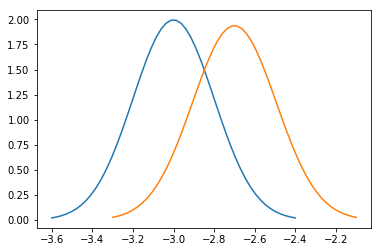

In [45]:
grid = np.linspace(0,1,100)
ψ = norm.pdf(grid, loc = μ, scale = s ** 2)
X = np.linspace(μ - 3 * s, μ + 3 * s)
Y = np.linspace(ρ * μ + b - 3 * s, ρ * μ + b + 3 * s)

# parameters for psi_t+1 distribution
avg = ρ * μ + b
s2 = ρ ** 2 * s ** 2 + σ ** 2

plt.plot(X, matplotlib.mlab.normpdf(X, μ, s))
plt.plot(Y, matplotlib.mlab.normpdf(Y, avg, np.sqrt(s2)))

In [53]:
i_grid = [100, 1000, 10_000]
for i in i_grid:
    init = np.random.normal(μ ** 2 , i)
    distance = update(init)
    kde = Kernel(distance)
    grid = np.linspace(-4, -1, i)
    density = kde.estimate_density(grid = grid)
    plt.plot(grid,density, label='{} grid points'.format(i))
plt.legend()

AttributeError: 'float' object has no attribute 'size'

### Exercise 3

In the lecture it was claimed that, for $n \times n$ matrix $A$, we have

$$ r(A) < 1 \implies A^k \to 0 $$

where convergence is in terms of the spectral norm.  

Prove this using Gelfand's formula.

$ r(A) = sup\{\frac{||Ax||}{||x||} : x \in R^k, x \neq0 \} $

$ \frac{||Ax||}{||x||} < 1 \quad \forall x $

$ ||A|| < 1 $

$ ||A^k -0|| = ||A^k|| < ||A||^k $

$ ||A|| < 1 \ \forall \epsilon \exists K \ \text{s.t.} \ ||A||^k < \epsilon \ \text{when} \ k > K $

$ ||A^k|| < \epsilon $